In [130]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models, datasets

In [178]:
model = models.resnet18()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model_dict = torch.load('/work/lisabdunlap/explain-eval/training/checkpoint/ckpt_10_250.pth')
print("epoch {0} acc {1}".format(model_dict['epoch'], model_dict['acc']))
model.load_state_dict(model_dict['net'])
model=model.cuda()
model.eval()

epoch 250 acc 86.72


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
device = 'cuda:4' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
correct = 0
total = 0
for batch_idx, (inputs, targets) in enumerate(testloader):
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predicted = outputs.max(1)
    total += targets.size(0)
    c = predicted.eq(targets).sum().item()
    correct += c

In [223]:
from techniques.generate_grounding import gen_grounding

import torchvision.transforms as transforms
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)
cifar_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

Files already downloaded and verified


In [227]:
'''def get_img(index):
    img = testset[index][0]
    displ_img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    displ_img = np.clip((std * displ_img + mean), 0, 1)
    #displ_img = np.uint8((displ_img / np.max(displ_img)) * 255)
    return displ_img'''
def get_img(index):
    idx = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            c = predicted.eq(targets).sum().item()
            if c == 1 and idx==index:
                img = inputs[0].cpu().numpy().transpose((1, 2, 0))
                print(cifar_classes[targets[0].cpu().numpy()])
                mean = np.array([0.4914, 0.4822, 0.4465])
                std = np.array([0.2023, 0.1994, 0.2010])
                img = np.clip((std * img + mean), 0, 1)
                break
            idx += 1
    return img

epoch 250 acc 86.72
ship


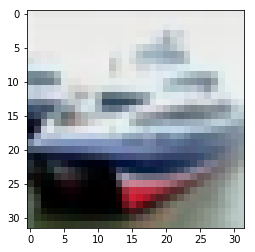

In [238]:
model = models.resnet18()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model_dict = torch.load('/work/lisabdunlap/explain-eval/training/checkpoint/ckpt_10_250.pth')
print("epoch {0} acc {1}".format(model_dict['epoch'], model_dict['acc']))
model.load_state_dict(model_dict['net'])
model = model.to(device)
model.eval()

img = get_img(1)
plt.imshow(img)

model numbr ckpt_10_156
model numbr ckpt_10_156
[0.39811] ship
finished gradcam explanation
------------------------------


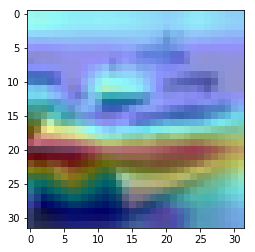

In [294]:
gcam_expl = gen_grounding(img, 'gcam', 'ex_img', 'ckpt_10_156', show=True, save=False, save_path='/work/lisabdunlap/explain-eval/training/examples/', index=1)

In [272]:
epochs = []
for root, dirs, files in os.walk('/work/lisabdunlap/explain-eval/training/checkpoint', topdown=False):
    for f in files:
        if '.pth' in f and 'final' not in f:
            epoch = int(f.split('_')[-1][:-4])
            if epoch <= 250:
                epochs += [epoch]
epochs = sorted(epochs)
print(epochs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 16, 18, 19, 20, 23, 34, 40, 44, 47, 49, 72, 148, 150, 151, 152, 153, 154, 155, 156, 157, 250]


epoch 0 acc 40.67
result path: /work/lisabdunlap/explain-eval/training/examples/ship_0/
model numbr ckpt_10_0
model numbr ckpt_10_0
[1.00000] plane
finished gradcam explanation
saving explanation mask....

saved to /work/lisabdunlap/explain-eval/training/examples/ship_0/gcam-ckpt_10_0
------------------------------
epoch 1 acc 48.95
result path: /work/lisabdunlap/explain-eval/training/examples/ship_1/
model numbr ckpt_10_1
model numbr ckpt_10_1
[1.00000] frog
finished gradcam explanation
saving explanation mask....

saved to /work/lisabdunlap/explain-eval/training/examples/ship_1/gcam-ckpt_10_1
------------------------------
epoch 2 acc 55.37
result path: /work/lisabdunlap/explain-eval/training/examples/ship_2/
model numbr ckpt_10_2
model numbr ckpt_10_2
[1.00000] plane
finished gradcam explanation
saving explanation mask....

saved to /work/lisabdunlap/explain-eval/training/examples/ship_2/gcam-ckpt_10_2
------------------------------
epoch 3 acc 61.15
result path: /work/lisabdunlap/e

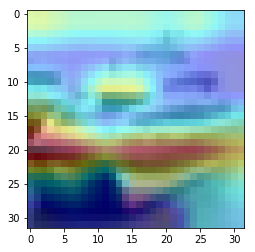

In [255]:
epochs = []
for root, dirs, files in os.walk('/work/lisabdunlap/explain-eval/training/checkpoint', topdown=False):
    for f in files:
        if '.pth' in f and 'final' not in f:
            epoch = int(f.split('_')[-1][:-4])
            if epoch <= 250:
                epochs += [epoch]
epochs = sorted(epochs)
print(epochs)

for i in epochs:
    label = 'ship_'+str(i)
    model_name='ckpt_10_'+str(i)
    
    model = models.resnet18()
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 10)
    model_dict = torch.load('/work/lisabdunlap/explain-eval/training/checkpoint/'+model_name+'.pth')
    print("epoch {0} acc {1}".format(model_dict['epoch'], model_dict['acc']))
    model.load_state_dict(model_dict['net'])
    model = model.to(device)
    model.eval()
    gcam_expl = gen_grounding(img, 'gcam', label, model_name, show=True, save=True, save_path='/work/lisabdunlap/explain-eval/training/examples/', index=1)
#cv2.imwrite('/work/lisabdunlap/explain-eval/training/examples/epoch0.png', img1)

In [302]:
paths = {}
for root, dirs, files in os.walk('/work/lisabdunlap/explain-eval/training/examples', topdown=False):
    for f in files:
        if 'ship' in root:
            if '.png' in f and '.ipynb' not in root and 'ckpt' in f:
                #print(os.path.join(root, f))
                paths[int(f.split('_')[-1][:-4])] = os.path.join(root, f)
print([k for k,v in paths.items()])

[154, 4, 19, 153, 3, 250, 7, 157, 10, 0, 150, 2, 152, 8, 44, 20, 18, 49, 34, 5, 155, 47, 151, 1, 23, 148, 11, 16, 72, 156, 6, 40]


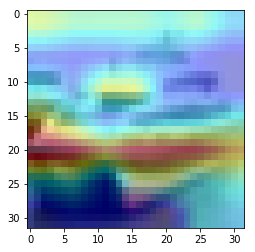

In [304]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
paths_idx = sorted(paths)
for i in paths_idx:
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(cv2.imread(paths[i]), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

HTML(ani.to_jshtml())

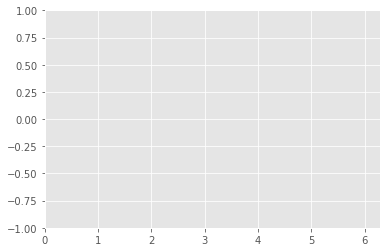

In [87]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())